- In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv("house_df.csv")
df.head()

,Id,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,SalePrice,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,...,HeatingQC_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3
0,1,0.500,0.380,0.282,-0.270,208500,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2,0.000,-0.312,-0.083,0.538,181500,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,3,0.500,0.497,0.530,-0.142,223500,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,4,0.500,0.391,0.671,-0.469,140000,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,5,1.000,1.134,1.474,0.305,250000,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [3]:
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

- Split your data into train and test sets.
- Estimate your model from the previous lesson in the train set. Assess the goodness of fit of your model.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [5]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
display(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     116.7
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:19:11   Log-Likelihood:                -13823.
No. Observations:                1168   AIC:                         2.773e+04
Df Residuals:                    1125   BIC:                         2.795e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.329e+05   1.13e+04     20.596      0.000    2.11e+05    2.55e+05
Id                   -3.3109      2.387     -1.387      0.166      -7.995       1.373
OverallQual         2.78e+04   2714.858     10.241      0.000    2.25e+04    3.31e+04
GrLivArea          3.189e+04   2532.793     12.592      0.000    2.69e+04    3.69e+04
GarageArea         1.019e+04   1792.733      5.681      0.000    6667.706    1.37e+04
TotalBsmtSF        8050.2560   2108.009      3.819      0.000    3914.184    1.22e+04
HouseStyle_1.5Unf  2893.0699   1.13e+04      0.255      0.798   -1.93e+04    2.51e+04
HouseStyle_1Story  1.086e+04   4218.317      2.573      0.010    2579.065    1.91e+04
HouseStyle_2.5Fin -1.874e+04   1.42e+04     -1.319      0.188   -4.66e+04    9147.526
HouseStyle_2.5Unf -2.274e+04   1.11e+04     -2.045      0.041   -4.46e+04    -918.401
HouseStyle_2Story  1809.1701   4027.641      0.449      0.653   -6093.363    9711.704
HouseStyle_SFoyer  1.257e+04   7842.208      1.603      0.109   -2812.432     2.8e+04
HouseStyle_SLvl    1.365e+04   6002.757      2.274      0.023    1873.433    2.54e+04
SaleType_CWD       1.223e+04   1.82e+04      0.671      0.503   -2.36e+04     4.8e+04
SaleType_Con       5.208e+04    2.5e+04      2.086      0.037    3083.859    1.01e+05
SaleType_ConLD    -4195.8119   1.44e+04     -0.292      0.770   -3.24e+04     2.4e+04
SaleType_ConLI    -6919.9735   1.81e+04     -0.383      0.702   -4.24e+04    2.85e+04
SaleType_ConLw     9579.0429   1.83e+04      0.524      0.600   -2.63e+04    4.54e+04
SaleType_New        1.93e+04   7129.278      2.707      0.007    5310.513    3.33e+04
SaleType_Oth       3.824e+04    2.5e+04      1.531      0.126   -1.08e+04    8.72e+04
SaleType_WD        9574.0193   5922.494      1.617      0.106   -2046.357    2.12e+04
GarageQual_Fa     -8841.8147   8226.733     -1.075      0.283    -2.5e+04    7299.652
GarageQual_Gd       1.39e+04   1.14e+04      1.216      0.224   -8522.279    3.63e+04
GarageQual_Po     -3976.9636   2.57e+04     -0.155      0.877   -5.43e+04    4.64e+04
GarageQual_TA      2027.3161   5959.276      0.340      0.734   -9665.229    1.37e+04
GarageFinish_RFn  -3867.0212   2877.537     -1.344      0.179   -9512.964    1778.921
GarageFinish_Unf  -8510.5389   3241.769     -2.625      0.009   -1.49e+04   -2149.946
KitchenQual_Fa    -4.007e+04   9029.293     -4.438      0.000   -5.78e+04   -2.24e+04
KitchenQual_Gd    -3.114e+04   5425.479     -5.739      0.000   -4.18e+04   -2.05e+04
KitchenQual_TA    -3.852e+04   6049.955     -6.366      0.000   -5.04e+04   -2.66e+04
HeatingQC_Fa      -8183.0421   5894.233     -1.388      0.165   -1.97e+04    3381.885
HeatingQC_Gd      -3984.9096   3119.437     -1.277      0.202   -1.01e+04    2135.659
HeatingQC_Po      -1.032e+04   3.57e+04     -0.289      0.773   -8.04e+04

- Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this lesson.
- Is the performance of your model satisfactory? Why?

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


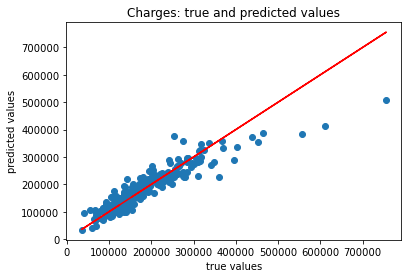

Mean absolute error of the prediction is           : 23035.401
Mean squared error of the prediction is            : 1279933490.832
Root mean squared error of the prediction is       : 35776.158
Mean absolute percentage error of the prediction is: 13.661


In [6]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is           : {:.3f}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is            : {:.3f}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is       : {:.3f}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {:.3f}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

    - The r squared of the model is satisfactory. In the graph, we see that our model predicts the lower values of the target better than the higher values

- Try to improve your model in terms of prediction performance by adding or removing some variables.

In [7]:
X['OverallQual_sq'] = X['OverallQual'] ** 2
X['OverallQual_GrLivArea'] = X['OverallQual'] * X['GrLivArea']
X['GarageArea_TotalBsmtSF'] = X['GarageArea'] * X['TotalBsmtSF']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

display(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     132.4
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:19:18   Log-Likelihood:                -13727.
No. Observations:                1168   AIC:                         2.755e+04
Df Residuals:                    1122   BIC:                         2.778e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.273e+05   1.19e+04     19.033      0.000    2.04e+05    2.51e+05
Id                        -0.9181      2.211     -0.415      0.678      -5.256       3.419
OverallQual             2.721e+04   2523.900     10.782      0.000    2.23e+04    3.22e+04
GrLivArea               2.633e+04   2437.391     10.803      0.000    2.15e+04    3.11e+04
GarageArea              1.114e+04   1685.688      6.608      0.000    7831.260    1.44e+04
TotalBsmtSF             1.615e+04   2067.032      7.815      0.000    1.21e+04    2.02e+04
HouseStyle_1.5Unf       -798.4822   1.05e+04     -0.076      0.939   -2.14e+04    1.98e+04
HouseStyle_1Story       1644.8156   3962.874      0.415      0.678   -6130.662    9420.293
HouseStyle_2.5Fin      -2.416e+04   1.31e+04     -1.840      0.066   -4.99e+04    1608.455
HouseStyle_2.5Unf      -2.202e+04   1.03e+04     -2.146      0.032   -4.22e+04   -1882.415
HouseStyle_2Story        560.6685   3742.588      0.150      0.881   -6782.590    7903.927
HouseStyle_SFoyer       2163.3115   7341.616      0.295      0.768   -1.22e+04    1.66e+04
HouseStyle_SLvl         1.012e+04   5564.819      1.818      0.069    -801.640     2.1e+04
SaleType_CWD            1.065e+04   1.69e+04      0.632      0.528   -2.24e+04    4.37e+04
SaleType_Con            4.879e+04    2.3e+04      2.117      0.034    3566.141     9.4e+04
SaleType_ConLD         -1437.1790   1.33e+04     -0.108      0.914   -2.75e+04    2.46e+04
SaleType_ConLI         -6909.9695   1.67e+04     -0.414      0.679   -3.96e+04    2.58e+04
SaleType_ConLw          1.616e+04   1.69e+04      0.957      0.339    -1.7e+04    4.93e+04
SaleType_New            2.607e+04   6601.889      3.949      0.000    1.31e+04     3.9e+04
SaleType_Oth            1.325e+04   2.31e+04      0.573      0.566   -3.21e+04    5.86e+04
SaleType_WD             1.137e+04   5470.872      2.079      0.038     638.693    2.21e+04
GarageQual_Fa          -1.229e+04   7736.665     -1.588      0.112   -2.75e+04    2891.139
GarageQual_Gd          -2584.6126   1.07e+04     -0.242      0.809   -2.35e+04    1.84e+04
GarageQual_Po          -8527.5625   2.38e+04     -0.358      0.720   -5.52e+04    3.82e+04
GarageQual_TA          -6233.9226   5731.824     -1.088      0.277   -1.75e+04    5012.378
GarageFinish_RFn       -2137.4141   2659.497     -0.804      0.422   -7355.562    3080.734
GarageFinish_Unf       -8301.1407   3002.996     -2.764      0.006   -1.42e+04   -2409.020
KitchenQual_Fa         -3.128e+04   8354.937     -3.744      0.000   -4.77e+04   -1.49e+04
KitchenQual_Gd         -2.089e+04   5146.311     -4.058      0.000    -3.1e+04   -1.08e+04
KitchenQual_TA         -2.861e+04   5710.499     -5.010      0.000   -3.98e+04   -1.74e+04
HeatingQC_Fa           -9185.3716   5457.955     -1.683      0.093   -1.99e+04  

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


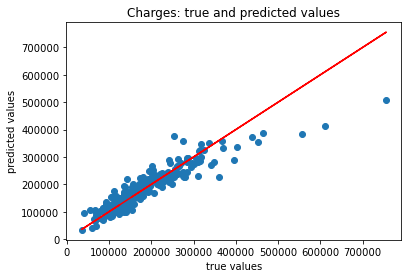

Mean absolute error of the prediction is           : 22838.493
Mean squared error of the prediction is            : 1128438028.473
Root mean squared error of the prediction is       : 33592.232
Mean absolute percentage error of the prediction is: 14.036


In [9]:
X_test = sm.add_constant(X_test)

y_preds_2 = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is           : {:.3f}".format(mean_absolute_error(y_test, y_preds_2)))
print("Mean squared error of the prediction is            : {:.3f}".format(mse(y_test, y_preds_2)))
print("Root mean squared error of the prediction is       : {:.3f}".format(rmse(y_test, y_preds_2)))
print("Mean absolute percentage error of the prediction is: {:.3f}".format(np.mean(np.abs((y_test - y_preds_2) / y_test)) * 100))

    - The model has improved both as seen in the graph and according to performance metrics.